In [25]:
# import packages 
import Functions as F
import pandas as pd 
from scipy.ndimage import convolve 
import math 
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rcParams.update({'font.size': 18})
import seaborn as sns

# import results (csv-files)
bestModel = "results/results05.csv"


### Figure 5.1 

In [39]:
# Figure 5.1 

def get_gaussian_derivative(t):
    kSize = 5
    s = np.sqrt(t)
    x = np.arange(int(-np.ceil(s*kSize)), int(np.ceil(s*kSize))+1)
    x = np.reshape(x,(-1,1))
    g = np.exp(-x**2/(2*t))
    g = g/np.sum(g)
    return np.reshape(g, (len(g), 1))

g = get_gaussian_derivative(5)
val = pd.read_csv("wandData/validation.csv")
convolve(val.iloc[:, 1], g)

plt.plot(val.iloc[:, 1])
plt.show()

RuntimeError: filter weights array has incorrect shape.

### Figure 5.2

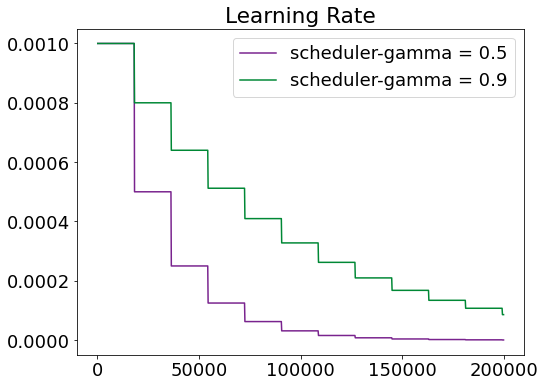

In [3]:
# a
lr = pd.read_csv("wandData/lr.csv")
plt.figure(figsize = (8, 6))
plt.plot(lr.iloc[:, 0], lr.iloc[:, 1], color = F.col(10).color, label = "scheduler-gamma = 0.5")
plt.plot(lr.iloc[:, 0], lr.iloc[:, 4], color = F.col(9).color, label = "scheduler-gamma = 0.8")
plt.title("Learning Rate")
plt.legend()
plt.show()

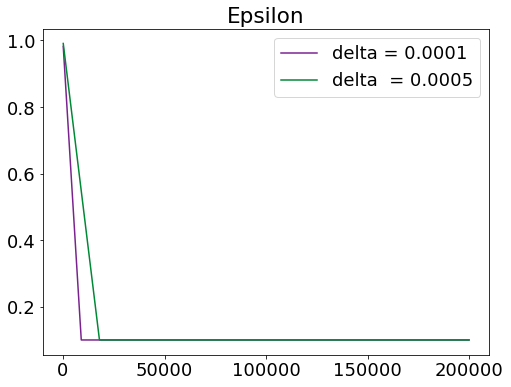

In [4]:
# b
epsilon = pd.read_csv("wandData/epsilon.csv")
plt.figure(figsize = (8, 6))
plt.plot(epsilon.iloc[:, 0], epsilon.iloc[:, 1], color = F.col(10).color, label = "delta = 0.0001")
plt.plot(epsilon.iloc[:, 0], epsilon.iloc[:, 4], color = F.col(9).color, label = "delta  = 0.0005")
plt.title("Epsilon")
plt.legend()
plt.show()

### Figure 5.3

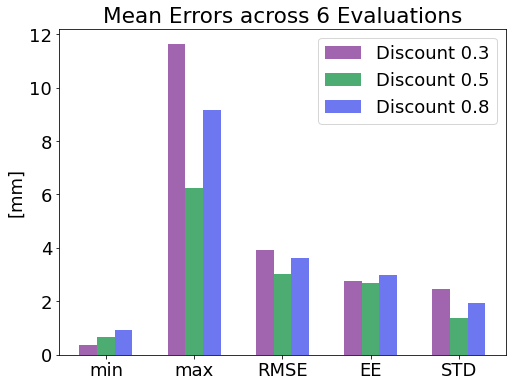

In [5]:
# a
err03 = [F.performence_metric("results/dis03/results03.csv", 6),
         F.performence_metric("results/dis03/results031.csv", 6),
         F.performence_metric("results/dis03/results032.csv", 6),
         F.performence_metric("results/dis03/results033.csv", 6),
         F.performence_metric("results/dis03/results034.csv", 6),
         F.performence_metric("results/dis03/results035.csv", 6)]

err08 = [F.performence_metric("results/dis08/results08.csv", 6),
         F.performence_metric("results/dis08/results081.csv", 6),
         F.performence_metric("results/dis08/results082.csv", 6),
         F.performence_metric("results/dis08/results083.csv", 6),
         F.performence_metric("results/dis08/results084.csv", 6),
         F.performence_metric("results/dis08/results085.csv", 6)]

# min_dis, max_dis, rmse, res
minerr03 = 0
minerr08 = 0
maxerr03 = 0
maxerr08 = 0
rmse03 = 0
rmse08 = 0
EE03 = 0
EE08 = 0
std03 = 0
std08 = 0
for i in range(0,6):
    ####### 03 #######
    name = err03[i]
    minerr03 += name[:,0]
    maxerr03 += name[:,1]
    rmse03 += name[:,2]
    EE03 += name[:,3]
    std03 += name[:,4]

    ####### 08 #######
    name = err08[i]
    minerr08 += name[:, 0]
    maxerr08 += name[:,1]
    rmse08 += name[:,2]
    EE08 += name[:,3]
    std08 += name[:,4]

dis03 = np.mean((np.array([minerr03, maxerr03, rmse03, EE03, std03]) / 6.0), axis = 1)
dis08 = np.mean((np.array([minerr08, maxerr08, rmse08, EE08, std08]) / 6.0), axis = 1)
dis05 = [0.6619, 6.2521, 3.012, 2.671, 1.3816]

###################################################################################
import matplotlib as mat 
mat.rcParams.update({'font.size': 18})
X = np.arange(5)
plt.figure(figsize=(8,6))
plt.bar(X - 0.2, dis03, color = [0.63215686, 0.39607843, 0.68980392], width = 0.2) # 10 
plt.bar(X + 0.00, dis05, color =  [0.3 , 0.67333333, 0.4454902], width = 0.2) # 9 
plt.bar(X + 0.2, dis08, color = [0.42901961, 0.47019608, 0.94235294], width = 0.2) # 1
plt.xticks([0,1, 2, 3, 4], ['min','max','RMSE', "EE", "STD"])
plt.ylabel('[mm]')
plt.legend(labels=['Discount 0.3','Discount 0.5','Discount 0.8'])
plt.title('Mean Errors across 6 Evaluations')
plt.show()

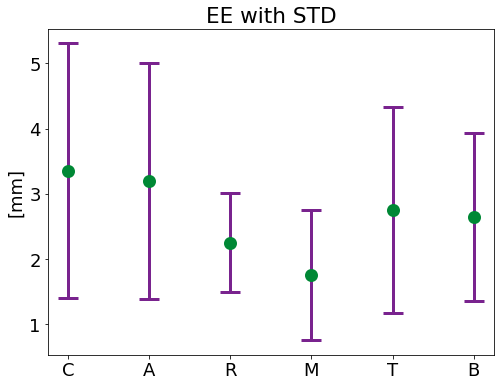

In [6]:
# b
labels = ['C', 'A', 'R', 'M', 'T', 'B']
res = F.performence_metric(bestModel, 6) 
x = [0, 1, 2, 3, 4, 5]
EE = res[:, 3]
STD = res[:, 4]

plt.figure(figsize = (8, 6))
plt.errorbar(x, EE, STD, fmt = 'o', color = F.col(9).color, ecolor = F.col(10).color, capsize = 10,markeredgewidth=3, lw = 3, ms = 10)
plt.xticks([0,1, 2, 3, 4,5], labels)
plt.ylabel("[mm]")
plt.title("EE with STD")
plt.show()

### Figure 5.4 

### Figure 5.7 

In [38]:
%matplotlib qt 
Viz = F.VisualizeAngle("results/results05.csv", 6)
Viz.get_coor()
angles_l = Viz.compute_all_angles()
angles_landmark = np.abs(angles_l[:, 0] - angles_l[:, 1])

Dij = F.Dijkstras("results/results05.csv", 6, 1, 2)
angles_d = Dij.compute_all_angles()
angles_dij = np.abs(angles_d[:, 0] - angles_d[:, 1])

angles_combi = np.abs(angles_l[:, 0] - angles_d[:, 1])

angles_all = np.concatenate([angles_landmark, angles_dij, angles_combi])
df = pd.DataFrame(angles_all, columns = ["Degrees"])
names = np.concatenate([22 * ["Landmark"], 22 * ["Dijkstra"], 22 * ["Combination"]])
df["Method"] = names 
plt.figure(figsize=(8, 6))
ax = sns.violinplot(x="Method", y="Degrees", data=df, cut = 0, palette = [[0.63215686, 0.39607843, 0.68980392], [0.3 , 0.67333333, 0.4454902], [0.42901961, 0.47019608, 0.94235294]]) 
ax.set_title("Differences in Angles")



c:\Users\There\OneDrive\Dokumenter\GitHub\Bachelor-thesis-ear\Functions\angleVis.py:99: RuntimeWarning: invalid value encountered in true_divide
  n /= np.linalg.norm(n)


Text(0.5, 1.0, 'Differences in Angles')